# Helix

In [1]:
import numpy as np


def circular_helix(a=None, b=None, *args, slope=None, pitch=None):
    """A circular helix of radius a and slope a/b (or pitch 2πb)"""
    if pitch is not None:
        b = b if b is not None else pitch / 2 / np.pi
    if slope is not None:
        a = a if a is not None else slope * b
        b = b if b is not None else slope / a
    def inner(t):
        return a * np.cos(t), a * np.sin(t), b * t
    return inner


circular_helix(1, 5)(1)

(0.5403023058681398, 0.8414709848078965, 5)

In [2]:
from dewloosh.mesh.space import CartesianFrame
from dewloosh.mesh import PolyData, LineData
import numpy as np

frame = CartesianFrame(dim=3)

coords = np.array(list(map(circular_helix(5, slope=5), np.linspace(0, 25, 100))))
topo = np.zeros((coords.shape[0]-1, 2))
topo[:, 0] = np.arange(topo.shape[0])
topo[:, 1] = topo[:, 0] + 1

mesh = PolyData(coords=coords, frame=frame)
mesh['helix'] = LineData(topo=topo, frame=frame)

#mesh.plot(notebook=False)

# Helicoid

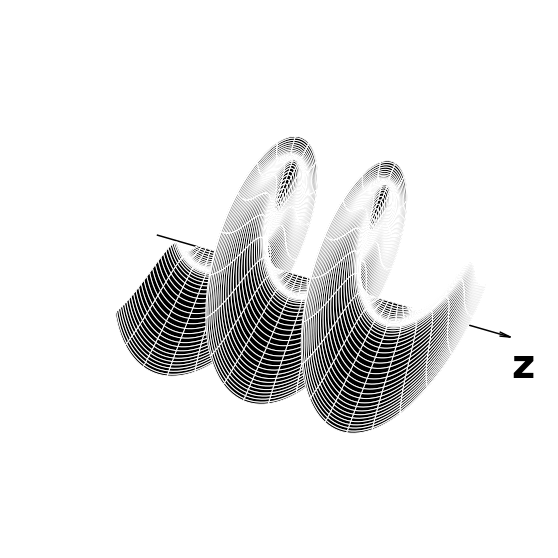

In [3]:
import numpy as np
from numpy import exp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def plot_helicoid():
    points = 100
    angle_min = 180
    angle_max = 700
    dangle = angle_max - angle_min
    r = 10.0
    c = 1.0
    n = dangle / 360

    u = np.linspace(0, r, endpoint=True, num=int(points * n))
    v = np.linspace(-np.deg2rad(angle_min), np.deg2rad(angle_max), endpoint=True, num=int(2 * points * n))
    u, v = np.meshgrid(u, v)

    r0 = 0.5 * r
    delta = 0.5 * r0
    amp = 2 * c
    x = u * np.cos(v)  + amp * exp(-((u - r0) / delta)**2)
    y = u * np.sin(v)  + amp * exp(-((u - r0) / delta)**2)
    z = c * v

    fig = plt.figure(figsize=(30, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(z, x, y, alpha=1, edgecolors='w', zorder=0, color='black')
    ax.quiver(-6, 0, 0, 24, 0, 0, length=1, arrow_length_ratio=0.03, color='black', zorder=1)
    ax.text(19, -2, -2, "$\mathbf{z}$", fontsize=40, color='black', zorder=1)
    ax._axis3don = False
    bbox = fig.bbox_inches.from_bounds(8, 2, 17, 6)


plot_helicoid()